In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import optuna 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix



In [45]:
data = pd.read_csv("/kaggle/input/spambase/spambase_csv.csv")
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [46]:
corr = data.corr(method="pearson")
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


([<matplotlib.axis.YTick at 0x7d16769f7310>,
 [Text(0, 0, 'word_freq_make'),
  Text(0, 1, 'word_freq_address'),
  Text(0, 2, 'word_freq_all'),
  Text(0, 3, 'word_freq_3d'),
  Text(0, 4, 'word_freq_our'),
  Text(0, 5, 'word_freq_over'),
  Text(0, 6, 'word_freq_remove'),
  Text(0, 7, 'word_freq_internet'),
  Text(0, 8, 'word_freq_order'),
  Text(0, 9, 'word_freq_mail'),
  Text(0, 10, 'word_freq_receive'),
  Text(0, 11, 'word_freq_will'),
  Text(0, 12, 'word_freq_people'),
  Text(0, 13, 'word_freq_report'),
  Text(0, 14, 'word_freq_addresses'),
  Text(0, 15, 'word_freq_free'),
  Text(0, 16, 'word_freq_business'),
  Text(0, 17, 'word_freq_email'),
  Text(0, 18, 'word_freq_you'),
  Text(0, 19, 'word_freq_credit'),
  Text(0, 20, 'word_freq_your'),
  Text(0, 21, 'word_freq_font'),
  Text(0, 22, 'word_freq_000'),
  Text(0, 23, 'word_freq_money'),
  Text(0, 24, 'word_freq_hp'),
  Text(0, 25, 'word_freq_hpl'),
  Text(0, 26, 'word_freq_george'),
  Text(0, 27, 'word_freq_650'),
  Text(0, 28, 'word

<Figure size 800x800 with 0 Axes>

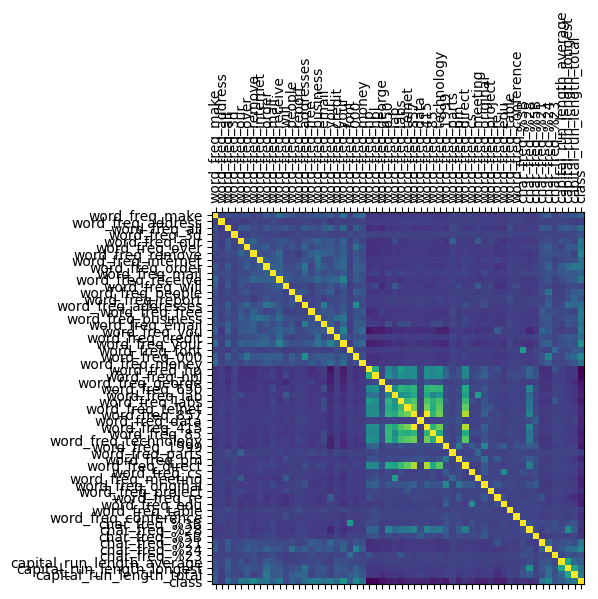

In [47]:
plt.figure(figsize=(8, 8))
plt.matshow(corr)

plt.xticks(range(len(data.columns)), data.columns, rotation=90)  
plt.yticks(range(len(data.columns)), data.columns)

In [48]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [49]:
data["capital_run_length_total"].mean()

283.28928493805694

In [50]:
data["capital_run_length_total"].dtype

dtype('int64')

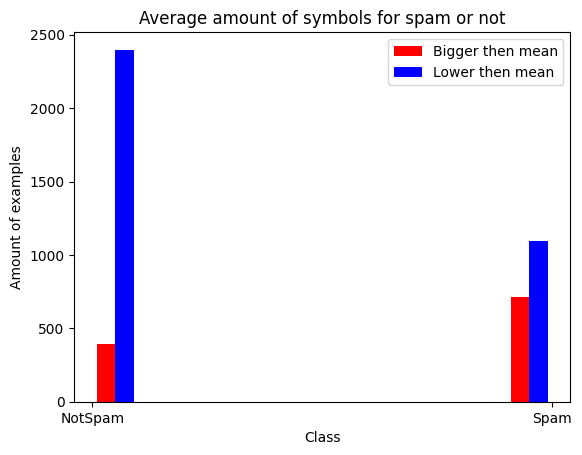

In [51]:
x = data[data["capital_run_length_total"] >= 283]["class"]
y = data[data["capital_run_length_total"] < 283]["class"]

plt.title("Average amount of symbols for spam or not")
plt.hist([x, y], color = ["red", "blue"], label = ["Bigger then mean", "Lower then mean"])
plt.xlabel("Class")
plt.ylabel("Amount of examples")
plt.xticks([0, 1], ["NotSpam", "Spam"])
plt.legend()

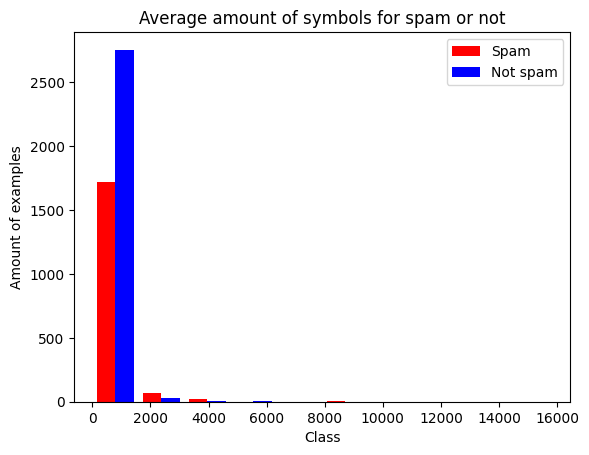

In [52]:
x = data[data["class"] == 1]["capital_run_length_total"]
y = data[data["class"] == 0]["capital_run_length_total"]

plt.title("Average amount of symbols for spam or not")
plt.hist([x, y], color = ["red", "blue"], label = ["Spam", "Not spam"])
plt.xlabel("Class")
plt.ylabel("Amount of examples")
plt.legend()

In [53]:
x = data.drop("class", axis = "columns")
y = data["class"]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [60]:
def optimization(trial):
    x = data.drop("class", axis = "columns")
    y = data["class"]

    x_sample, x_test, y_sample, y_test = train_test_split(x, y, test_size = 0.2)

    model_name = trial.suggest_categorical("model_name", ["LogRegr", "SVC", "Tree", "KNN"])

    if model_name == "LogRegr":
        penalty = trial.suggest_categorical('penalty', ["l2", "none"])
        max_iter = trial.suggest_int("max_iter", 10, 50)
        n_jobs = trial.suggest_int("n_jobs", 1, 5)

        clf = LogisticRegression(
            penalty = penalty,
            max_iter = max_iter,
            n_jobs = n_jobs
        )


    elif model_name == "SVC":
        C = trial.suggest_int("C", 1, 4)
        degree = trial.suggest_int("degree", 2, 5)
        gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
        max_iter = trial.suggest_int("max_iter", 1, 20)

        clf = SVC(
            C = C,
            degree = degree,
            gamma = gamma,
            max_iter = max_iter
        )

    elif model_name == "Tree":
        max_depth = trial.suggest_int("max_depth", 3, 12)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
        criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

        clf = DecisionTreeClassifier(
            max_depth = max_depth,
            min_samples_split = min_samples_split,
            min_samples_leaf = min_samples_leaf,
            criterion = criterion
        )

    elif model_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 7)
        weights = trial.suggest_categorical("weights", ["uniform", "distance"])
        algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree"])

        clf = KNeighborsClassifier(
            n_neighbors = n_neighbors,
            weights = weights,
            algorithm = algorithm
        )

    
    columns_to_scale = ["capital_run_length_longest", "capital_run_length_total"]


    preprocessor = ColumnTransformer(
        transformers=[("scale",  MinMaxScaler(), columns_to_scale)]
    )


    best_model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", clf)
    ])

    
    best_model.fit(x_sample, y_sample)
    y_preds = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)

    return accuracy
        
        
        
    

In [61]:
study = optuna.create_study(direction="maximize")
study.optimize(optimization, n_trials=40)

[I 2024-11-07 11:05:22,815] A new study created in memory with name: no-name-deedf4ad-6533-4f8f-a853-ffaa07877def
[I 2024-11-07 11:05:23,738] Trial 0 finished with value: 0.6178067318132465 and parameters: {'model_name': 'LogRegr', 'penalty': 'l2', 'max_iter': 20, 'n_jobs': 3}. Best is trial 0 with value: 0.6178067318132465.
[I 2024-11-07 11:05:23,764] Trial 1 finished with value: 0.7871878393051032 and parameters: {'model_name': 'Tree', 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 7, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.7871878393051032.
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2024-11-07 11:05:23,786] Trial 2 finished with value: 0.2975027144408252 and parameters: {'model_name': 'SVC', 'C': 1, 'degree': 5, 'gamma': 'scale', 'max_iter': 10}. Best is trial 1 with value: 0.787187

In [62]:
print("Best trial:")
trial = study.best_trial
print(f"Accuracy: {trial.value}")
print(f"Best hyperparameters: {trial.params}")

Best trial:
Accuracy: 0.7991313789359392
Best hyperparameters: {'model_name': 'Tree', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 6, 'criterion': 'gini'}


In [66]:
trial = study.best_trial
best_params = trial.params 

clf = DecisionTreeClassifier(
    max_depth = best_params["max_depth"],
    min_samples_split = best_params["min_samples_split"],
    min_samples_leaf = best_params["min_samples_leaf"],
    criterion = best_params["criterion"]
)

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=5)

In [67]:
clf.score(x_test, y_test)

0.9153094462540716

In [71]:
preds = clf.predict(x_test)

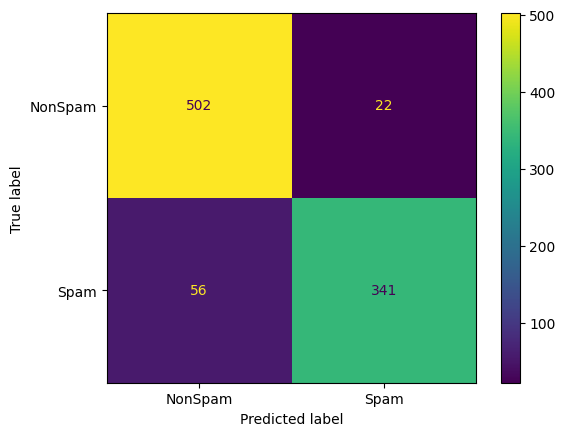

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=["NonSpam", "Spam"])